# Simple Plots

### Volcano Plot

In [11]:
""" Imports """
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn

In [ ]:
""" Data Read-in """
# Load the bacterial genome fna file
genome_record = SeqIO.read(bact_genome_fna, 'fasta')

# Load the log2 fold change data
df = pd.read_csv(log2_fc_csv)

# Ensure the 'locus', 'design', and 'Log2FC' columns exist in your DataFrame
if 'locus' not in df.columns or 'design' not in df.columns or 'Log2FC' not in df.columns:
    raise ValueError("The data file must contain 'locus', 'design', and 'Log2FC' columns.")

In [48]:
""" Read in data and add in significance column"""
df = pd.read_csv(log2fc_pval_csv)
df['significant'] = numpy.where((df['p-value'] < p_val_cutoff) & (abs(df['Log2FC']) > log2fc_cutoff), True, False)


In [66]:
""" Find top 10 enriched/depleted guides """
df_enriched = df[(df['Log2FC'] > log2fc_cutoff) & (df['p-value'] < p_val_cutoff)]
df_enriched = df_enriched.sort_values(by='Log2FC', ascending=False)
df_enriched = df_enriched.reset_index(drop=True)
df_enriched = df_enriched.head(n_top_guides)

df_depleted = df[(df['Log2FC'] < -log2fc_cutoff) & (df['p-value'] < p_val_cutoff)]
df_depleted = df_depleted.sort_values(by='Log2FC', ascending=True)
df_depleted = df_depleted.reset_index(drop=True)
df_depleted = df_depleted.head(n_top_guides)


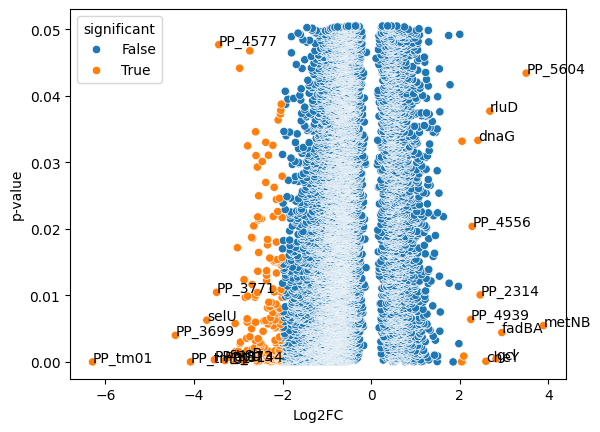

In [70]:
""" Volcano Plot"""

plot1=seaborn.scatterplot(df,x="Log2FC", y="p-value", hue="significant")
for i, gene_name in enumerate(df_enriched["design"]):
    plot1.text(df_enriched["Log2FC"][i], df_enriched["p-value"][i], gene_name)
for i, gene_name in enumerate(df_depleted["design"]):
    plot1.text(df_depleted["Log2FC"][i], df_depleted["p-value"][i], gene_name)


##### * note, this tutorial dataset was already subset for significant p-values before plotting. Normally the orange points would localize around the bottom left and right only

### Barplot - Top Enriched and Depleted Genes

<Figure size 640x480 with 0 Axes>

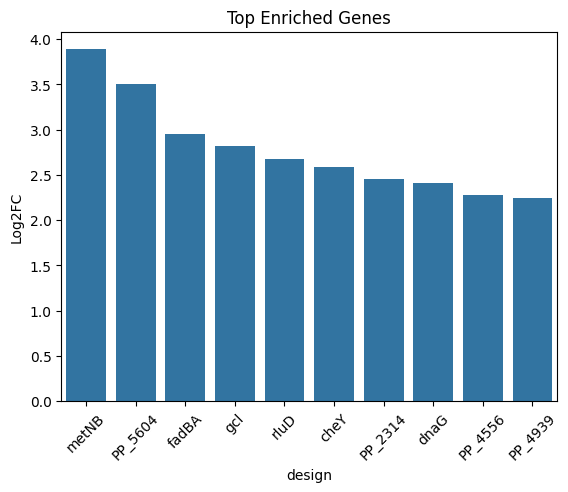

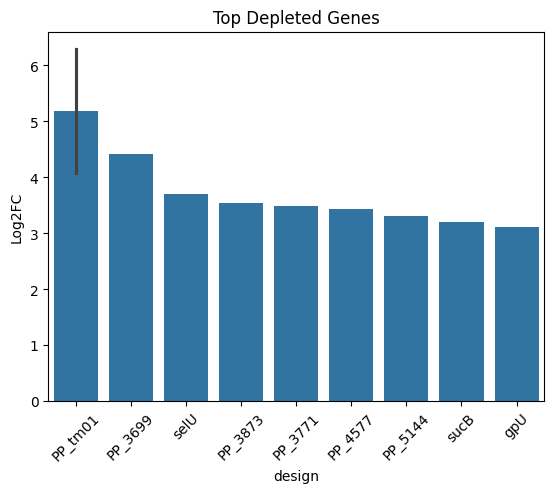

<Figure size 640x480 with 0 Axes>

In [80]:
# simple bar plot of Log2FC for top enriched and depleted genes
plt.figure()
seaborn.barplot(x=df_enriched["design"], y=df_enriched["Log2FC"])
plt.title("Top Enriched Genes")
plt.xticks(rotation=45)
plt.figure()

seaborn.barplot(x=df_depleted["design"], y=-df_depleted["Log2FC"])
plt.title("Top Depleted Genes")
plt.xticks(rotation=45)
plt.figure()